In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #подключение библиотек

url = 'https://github.com/mirea-aie-2025/aie-course-meta/blob/main/seminars/S02/S02-hw-dataset.csv'
raw_url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv' #преобразование raw-ссылки для CSV

df = pd.read_csv(raw_url)
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [28]:
#2.3.1
df.head(n=6) #вывод первых 6 строк


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785


In [3]:
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов \n")

df.info() #информация о типах данных


Размер датасета: 41 строк, 5 столбцов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
display(df.describe()) #базовые описательные статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [53]:
missing_data = df.isna().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Пропусков': missing_data,
    'Процент': missing_percentage
})

print("\n1. Пропущенные значения по столбцам:")
print(missing_summary[missing_summary['Пропусков'] > 0])

duplicates = df.duplicated().sum()
print(f"\n2. Полностью дублирующих строк: {duplicates}")

if duplicates > 0:
    print("Первые 5 дубликатов:")
    print(df[df.duplicated()].head())


1. Пропущенные значения по столбцам:
           Пропусков    Процент
age                2   4.878049
age_group         27  65.853659

2. Полностью дублирующих строк: 1
Первые 5 дубликатов:
    user_id   age country  purchases  revenue age_group
40       10  24.0      RU          7      511     22-25


In [31]:
def print_problem_rows(df, condition, message):
    """Выводит строки, удовлетворяющие условию, в табличном формате"""
    problem_df = df[condition]
    if len(problem_df) > 0:
        print(f"\n{message} ({len(problem_df)} строк):")
        print(problem_df[['user_id', 'age', 'country', 'purchases', 'revenue']].to_string())
    return problem_df

# Использование:
print_problem_rows(df, df['purchases'] < 0, "Отрицательные purchases")
print_problem_rows(df, ~df['age'].between(10, 100), "Нереалистичный возраст")

#были обнаружены данные с проблемами в виде нереалистичного возраста, а также его отсутсвия + были выведы строчки с отрицательныыми значениями purchases


Отрицательные purchases (1 строк):
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Нереалистичный возраст (4 строк):
    user_id    age country  purchases  revenue
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
12       13    NaN      US          9      630
20       21    5.0      RU          8     1488


,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
12,13,NaN,US,9,630
20,21,5.0,RU,8,1488



1. Частоты категориальных переменных:

country:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

2. Группировка по 'country':
           user_id           
              mean  sum count
country                      
CN       10.000000   20     2
DE       24.666667  148     6
FR       20.666667  248    12
RU       18.076923  235    13
US       22.375000  179     8

ВИЗУАЛИЗАЦИЯ ДАННЫХ


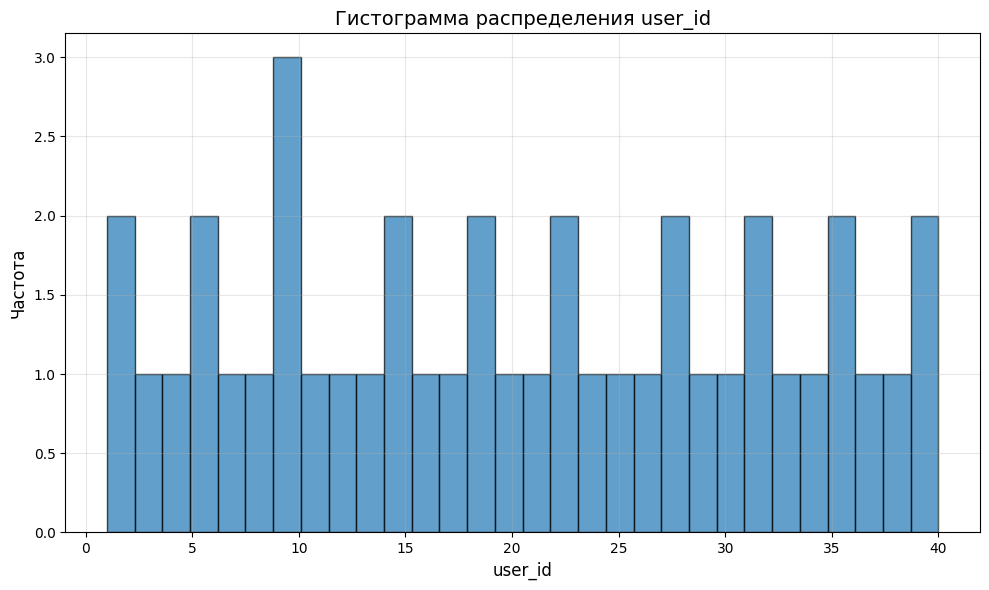

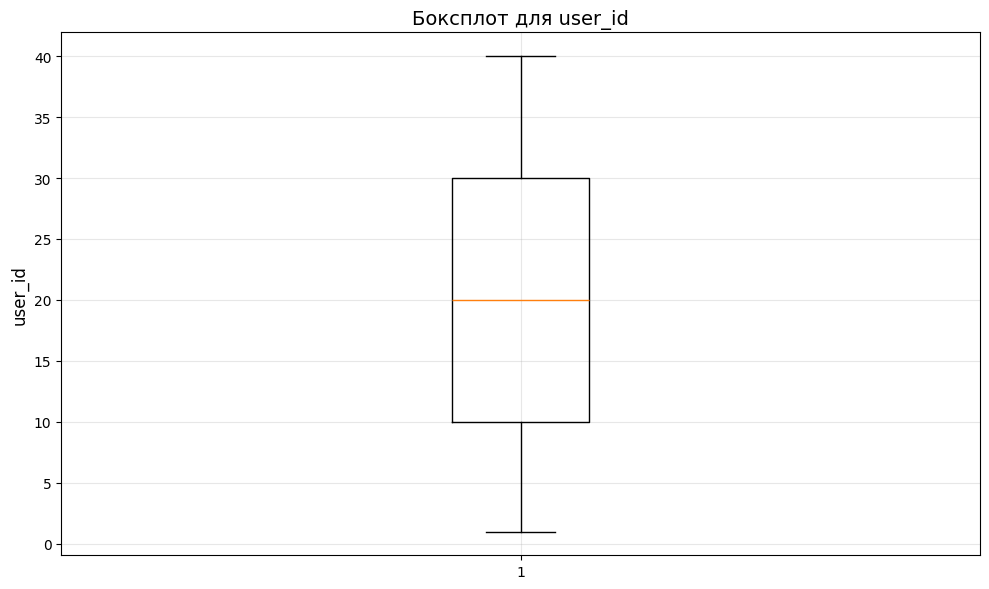

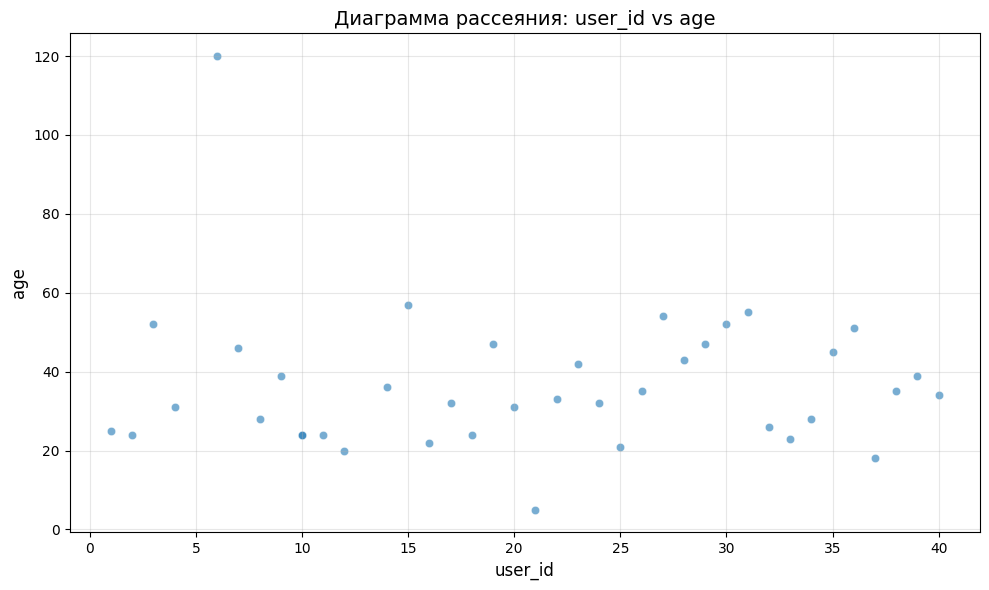

In [73]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    print("\n1. Частоты категориальных переменных:")
    for i, col in enumerate(categorical_cols[:2]):
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))

    if categorical_cols:
        print(f"\n2. Группировка по '{categorical_cols[0]}':")
        grouped = df.groupby(categorical_cols[0]).agg({
            numeric_cols[0]: ['mean', 'sum', 'count'] if numeric_cols else None
        })
        print(grouped.head())

print("\n" + "=" * 50)
print("ВИЗУАЛИЗАЦИЯ ДАННЫХ")
print("=" * 50)

os.makedirs('figures', exist_ok=True)

if numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df[numeric_cols[0]].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Гистограмма распределения {numeric_cols[0]}', fontsize=14)
    plt.xlabel(numeric_cols[0], fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figures/histogram.png', dpi=300, bbox_inches='tight')
    plt.show()

if numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[numeric_cols[0]].dropna())
    plt.title(f'Боксплот для {numeric_cols[0]}', fontsize=14)
    plt.ylabel(numeric_cols[0], fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figures/boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()

if len(numeric_cols) >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[numeric_cols[0]], df[numeric_cols[1]], alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title(f'Диаграмма рассеяния: {numeric_cols[0]} vs {numeric_cols[1]}', fontsize=14)
    plt.xlabel(numeric_cols[0], fontsize=12)
    plt.ylabel(numeric_cols[1], fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('figures/scatter_plot.png', dpi=300, bbox_inches='tight')
    plt.show()